# Saving and Loading models using .syspy extension

Example created by Samir Angelo Milani Martins

---
### Obtaining the model using FROLS.

In [1]:
import pandas as pd
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_results
from sysidentpy.utils.save_load import save_model, load_model


# Generating 1 input 1 output sample data from a benchmark system
x_train, x_valid, y_train, y_valid = get_siso_data(n=1000,
                                                   colored_noise=False,
                                                   sigma=0.0001,
                                                   train_percentage=90)

basis_function = Polynomial(degree=2)

model = FROLS(
    order_selection=True,
    n_info_values=3,
    extended_least_squares=False,
    ylag=2, xlag=2,
    info_criteria='aic',
    estimator='least_squares',
    basis_function=basis_function
)

model.fit(X=x_train, y=y_train)

yhat = model.predict(X=x_valid, y=y_valid)

# Gathering results
r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])

---
### Saving obtained model in file "model_name.syspy"

In [2]:
# save_model(model_variable, file_name.syspy, path (optional))
save_model(model, 'model_name.syspy', 'C:/Users/Samir/Desktop/')

---
### Loading model and checking if everything went smoothly


 Original model 
       Regressors  Parameters             ERR
0        x1(k-2)  8.9999E-01  9.57779971E-01
1         y(k-1)  2.0000E-01  3.88664742E-02
2  x1(k-1)y(k-1)  9.9992E-02  3.35352029E-03

 Model Loaded from file 
       Regressors  Parameters             ERR
0        x1(k-2)  8.9999E-01  9.57779971E-01
1         y(k-1)  2.0000E-01  3.88664742E-02
2  x1(k-1)y(k-1)  9.9992E-02  3.35352029E-03

 Predictions are the same!


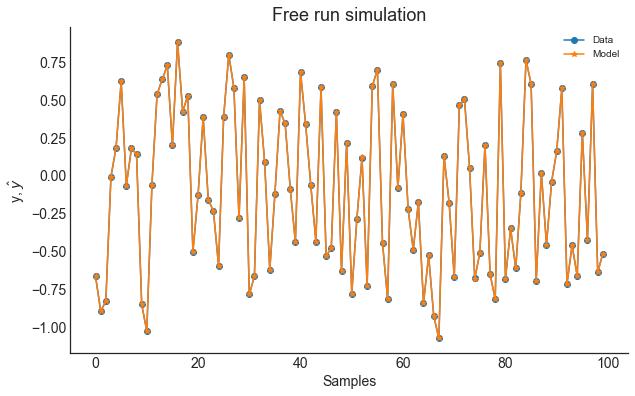

In [3]:
# load_model(file_name.syspy, path (optional))
loaded_model = load_model('model_name.syspy', 'C:/Users/Samir/Desktop/')

# Predicting output with loaded_model
yhat_loaded = loaded_model.predict(X=x_valid, y=y_valid)

r_loaded = pd.DataFrame(
    results(
        loaded_model.final_model, loaded_model.theta, loaded_model.err,
        loaded_model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])

# Printing both: original model and model loaded from file
print('\n Original model \n', r)
print('\n Model Loaded from file \n',r_loaded)

# Checking predictions from both: original model and model loaded from file
if (yhat==yhat_loaded).all():
    print('\n Predictions are the same!')
    
# Ploting results
plot_results(y=y_valid, yhat=yhat_loaded, n=1000)